In [16]:
from glob import glob
import pickle

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
file_list = glob('data8/*')

In [19]:
all_data_dicts = {
    'S':[],
    'M':[],
    'L':[],
    'X':[]
}

for filename in file_list:
    with open(filename, 'rb') as handle:
        this_dict = pickle.load(handle)
        this_dict['t']=int(filename[-8])
        all_data_dicts[filename[12]].append(this_dict)




In [20]:
all_data_dicts

{'S': [{'sig_ratio': 0.055, 'dimension': 1, 'result': [[1, -1]], 't': 5},
  {'sig_ratio': 0.02, 'dimension': 1, 'result': [[1, 0]], 't': 3},
  {'sig_ratio': 0.1, 'dimension': 18, 'result': [[18, 1]], 't': 0},
  {'sig_ratio': 0.09, 'dimension': 30, 'result': [[30, 1]], 't': 2},
  {'sig_ratio': 0.065, 'dimension': 1, 'result': [[1, 1]], 't': 6},
  {'sig_ratio': 0.1, 'dimension': 18, 'result': [[18, 4]], 't': 6},
  {'sig_ratio': 0.01, 'dimension': 1, 'result': [[1, -1]], 't': 0},
  {'sig_ratio': 0.005, 'dimension': 1, 'result': [[1, -1]], 't': 0},
  {'sig_ratio': 0.07, 'dimension': 30, 'result': [[30, 0]], 't': 0},
  {'sig_ratio': 0.1, 'dimension': 10, 'result': [[10, 2]], 't': 5},
  {'sig_ratio': 0.08, 'dimension': 4, 'result': [[4, 3]], 't': 9},
  {'sig_ratio': 0.075, 'dimension': 12, 'result': [[12, 0]], 't': 7},
  {'sig_ratio': 0.035, 'dimension': 1, 'result': [[1, -1]], 't': 3},
  {'sig_ratio': 0.075, 'dimension': 14, 'result': [[14, 0]], 't': 1},
  {'sig_ratio': 0.04, 'dimension': 2

In [21]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return out



In [22]:
numbers_S = make_dict('S')

In [23]:
numbers_M = make_dict('M')
numbers_L = make_dict('L')
numbers_XS = make_dict('X')

In [24]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [25]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XS = sort_dict(numbers_XS)

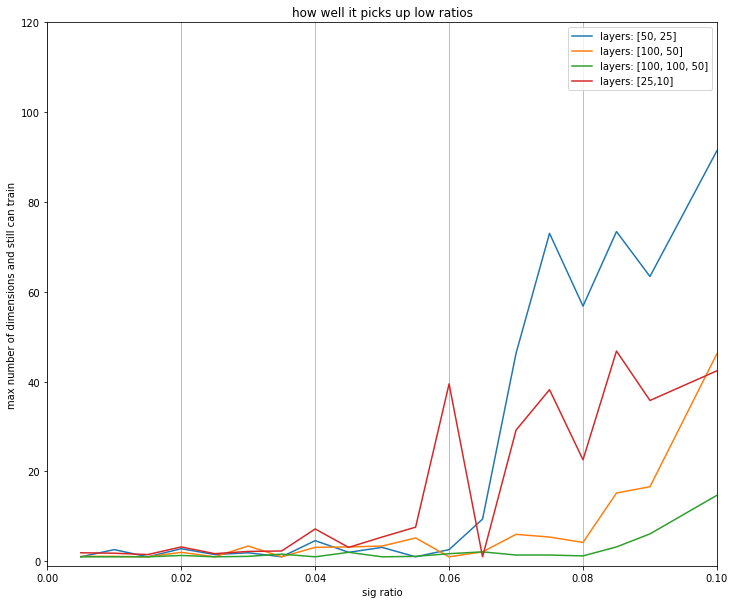

In [26]:
    
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(numbers_S.keys(), numbers_S.values(),label = 'layers: [50, 25]')
ax.plot(numbers_M.keys(), numbers_M.values(),label = 'layers: [100, 50]')
ax.plot(numbers_L.keys(), numbers_L.values(),label = 'layers: [100, 100, 50]')

ax.plot(numbers_XS.keys(), numbers_XS.values(),label = 'layers: [25,10]')


ax.legend()

ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
ax.set_xlim((0,0.1))
ax.set_ylim((-1, 120))
ax.grid(axis="x", which = 'both')

plt.show()

In [27]:
export = {
    'S':numbers_S,
    'M':numbers_M,
    'L':numbers_L,
    'XS':numbers_XS
}

export

{'S': {0.005: 1.0,
  0.01: 2.6,
  0.015: 1.0,
  0.02: 2.8,
  0.025: 1.5,
  0.03: 1.9,
  0.035: 1.0,
  0.04: 4.6,
  0.045: 2.0,
  0.05: 3.1,
  0.055: 1.0,
  0.06: 2.6,
  0.065: 9.4,
  0.07: 46.3,
  0.075: 73.0,
  0.08: 56.8,
  0.085: 73.4,
  0.09: 63.4,
  0.1: 91.4},
 'M': {0.005: 1.1,
  0.01: 1.1,
  0.015: 1.0,
  0.02: 2.0,
  0.025: 1.0,
  0.03: 3.4,
  0.035: 1.0,
  0.04: 3.1,
  0.045: 3.2,
  0.05: 3.4,
  0.055: 5.2,
  0.06: 1.0,
  0.065: 2.1,
  0.07: 6.0,
  0.075: 5.4,
  0.08: 4.2,
  0.085: 15.2,
  0.09: 16.6,
  0.1: 46.2},
 'L': {0.005: 1.0,
  0.01: 1.0,
  0.015: 1.0,
  0.02: 1.3,
  0.025: 1.0,
  0.03: 1.1,
  0.035: 1.6,
  0.04: 1.0,
  0.045: 2.0,
  0.05: 1.0,
  0.055: 1.1,
  0.06: 1.7,
  0.065: 2.1,
  0.07: 1.4,
  0.075: 1.4,
  0.08: 1.2,
  0.085: 3.2,
  0.09: 6.1,
  0.1: 14.7},
 'XS': {0.005: 1.9,
  0.01: 1.8,
  0.015: 1.5,
  0.02: 3.2,
  0.025: 1.7,
  0.03: 2.2,
  0.035: 2.3,
  0.04: 7.2,
  0.045: 3.1,
  0.05: 5.4,
  0.055: 7.6,
  0.06: 39.5,
  0.065: 1.0,
  0.07: 29.2,
  0.075: 3

In [28]:
with open('data_export/main_no_box/res8.pickle', 'wb') as handle:
    pickle.dump(export, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [12]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    # out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return numbers_S


In [13]:
numbers_S = make_dict('S')

In [14]:
numbers_S = sort_dict(numbers_S)


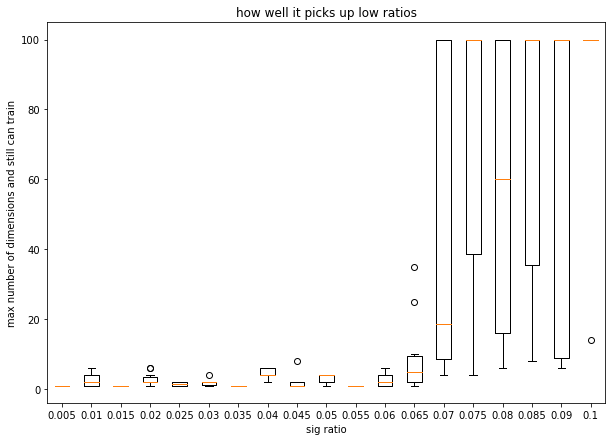

In [15]:
labels = []
data = []
for x, y in numbers_S.items():
    data.append(y)
    labels.append(x)
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data)
 
      
# x-axis labels
ax.set_xticklabels(labels)
 
# Adding title
ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
 
     
# show plot
plt.show()